In [47]:
import pandas as pd
from collections import Counter
import numpy as np
import itertools
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,classification_report ,confusion_matrix,f1_score,precision_score,roc_auc_score,recall_score)

In [2]:
#load the csv file
df = pd.read_csv('C:/Users/Dev/Downloads/creditcard.csv/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# The original shape of the dataset

df.shape

(284807, 31)

In [4]:
# The names of the columns of the dataset

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# The mathematicial description of our dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# More information about our data for example tha type of it's column

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking if there are any missing data in our dataset, luckily there is none

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Determine number of fraud cases in the dataset
# Valid transaction if Class = 0 and Fraud if Class = 1


valid = len(df[df['Class'] == 0])
fraud = len(df[df['Class'] == 1])

Outlier_Fraction = (fraud/(valid+fraud)) * 100

print('The outlier fraction is :' , Outlier_Fraction) 
print('The valid transactions are :'  , valid ) 
print('The fraud transactions are :'  , fraud )

The outlier fraction is : 0.1727485630620034
The valid transactions are : 284315
The fraud transactions are : 492


In [9]:
# Information about the valid transactions only

print('Amount details of valid transaction')

valid_info= df[(df['Class']==0)]
valid_info.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
# Information about the fraud transactions only

print('Amount details of fraud transaction')

fraud_info = df[df['Class'] ==1]
fraud_info.Amount.describe()

Amount details of fraud transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

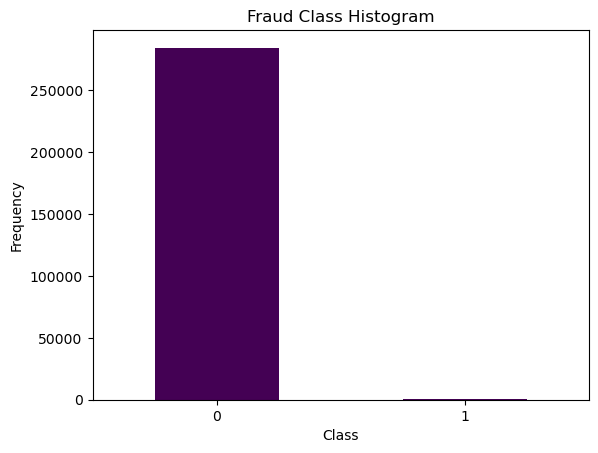

In [11]:
# Checking for the fraud and valid trasactions in a graph for better understanding

count_classes = pd.value_counts(df['Class'], sort = True ).sort_index()
count_classes.plot(kind = 'bar' ,rot = 0 ,colormap ='viridis')

plt.title ( "Fraud Class Histogram" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

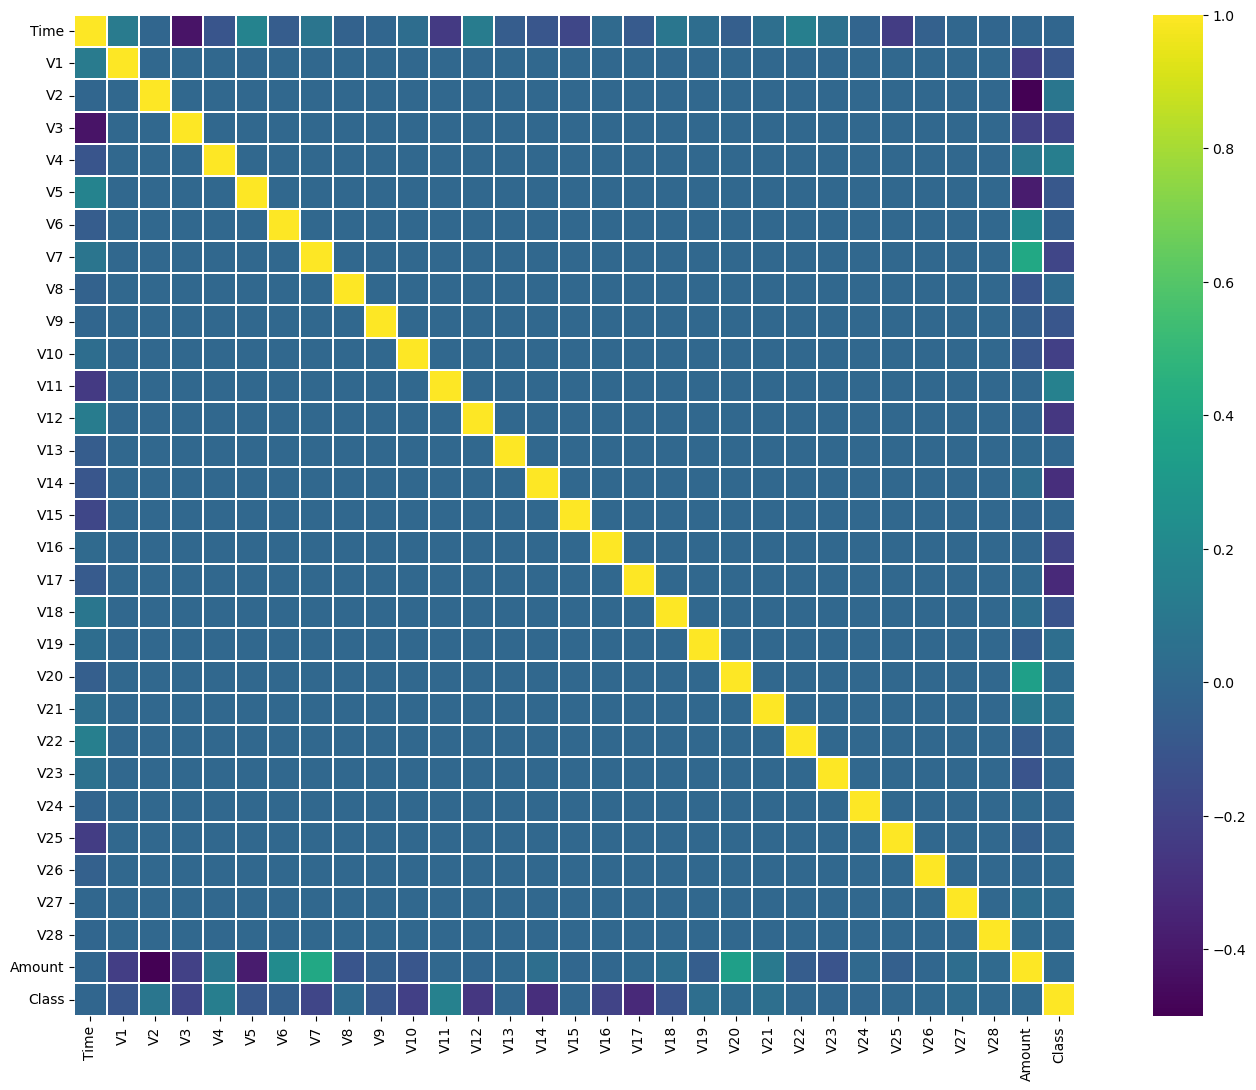

In [12]:
# Correlation matrix of the original dataset, we will not use this in order to find our outliers
# We use it only for a quick view and understanding the original dataset

corrmat = df.corr() 
fig = plt.figure(figsize = (20, 13)) 
sns.heatmap(corrmat, cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show() 

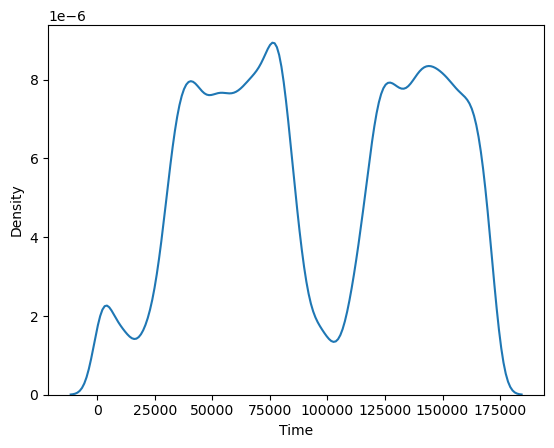

In [13]:
# Distribution of our dataset in Time

sns.kdeplot(df['Time'])
plt.show()

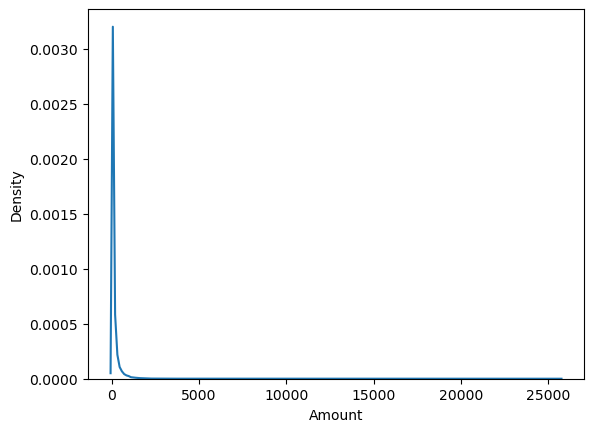

In [14]:
# Distribution of our dataset in Amount of transaction

sns.kdeplot(df['Amount'])
plt.show()

In [15]:
# Our Vi columns are already scaled that's why we only scaled the columns 'Amount' and 'Time'
# After this we must remove the old columns and replace them with the new, making a new dataset with the right values
stc = StandardScaler()
df['scaled_amount'] = stc.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = stc.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount' , 'Time'] , axis = 1 , inplace = True )
scaled_amount = df['scaled_amount']
scaled_time   = df['scaled_time']
df.drop(['scaled_amount' , 'scaled_time'] , axis = 1 , inplace = True )
df.insert(0 , 'scaled_amount' , scaled_amount)
df.insert(1 , 'scaled_time' , scaled_time)
df.head()






,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
df = df.sample(frac=1)

# We take all the fraud transactions from the original dataset
fraud_df =  df[df['Class'] ==1]
# We just want to take 492 random choices of valid transactions, in order to create the new dataframe
valid_df = df.loc[np.random.choice(df.index, 492, replace=False)]
# We join them
normal_distributed_df = pd.concat([fraud_df, valid_df],axis=0)

# We shuffle the new dataframe and make it normal distributed
new_df = normal_distributed_df.sample(frac=1, random_state=42)


new_df = pd.DataFrame(new_df)
new_df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
96824,-0.265511,-0.607813,-0.876433,-0.014494,0.147897,0.392095,1.716659,-1.510778,0.341667,0.055502,-0.480435,-0.619716,0.813920,-0.163041,-1.321844,-0.305654,-0.426931,0.742181,-0.102965,1.074343,-0.623417,0.051562,0.209456,0.212124,0.183500,-0.139971,-0.751153,-0.698074,0.180479,0.263034,0
17480,0.046539,-1.391062,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,3.829427,-5.314332,1.446930,-4.579264,-0.142299,-4.997848,-10.961410,-4.641482,0.567056,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1
234133,-0.349231,1.116641,2.058456,0.560800,-2.438319,0.747260,0.569163,-1.736529,0.349929,-0.382713,0.570212,-1.188909,0.006309,-0.462256,-0.338652,-2.474774,1.118733,0.830319,1.735737,1.360598,-0.640487,-0.171049,0.083818,0.429847,-0.061659,-0.334211,0.266068,-0.092334,0.017684,0.005609,0
40085,-0.349231,-1.152455,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,-1.959809,2.804335,0.312424,-0.595976,-4.662577,-0.299515,1.001414,3.902825,1.619609,-0.888087,-0.060159,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1
154719,-0.353229,0.165455,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,-6.868509,7.150625,-10.262984,2.733085,-10.127525,-0.262784,-5.190271,-8.655711,-2.024443,1.560479,0.098132,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,1


In [17]:
# Our new dataset which contains 984 transactions in random order (492 valid and 492 fraud)
# 492 + 492 = 984, so the shape of the new_df is correct

new_df.shape

(984, 31)

Distribution of the Classes in the new dataset




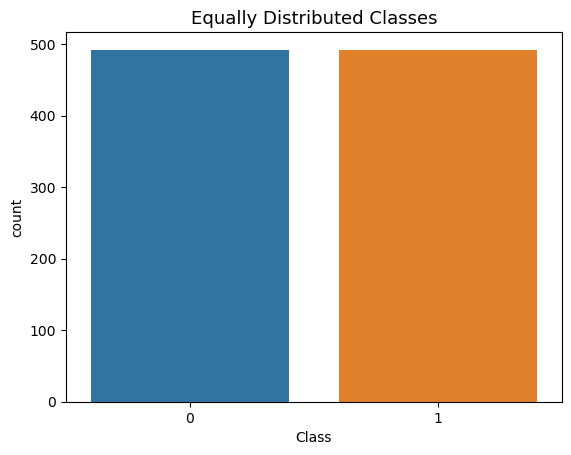

In [18]:
# We present the new dataset of the equally possible transactions

print('Distribution of the Classes in the new dataset')

sns.countplot('Class', data=new_df)
sns.color_palette("Set2", 2)
print('\n')
plt.title('Equally Distributed Classes',fontsize=13)
plt.show()

In [19]:
# We show the ratio of the new dataframe
# Our data are equally likely as we can see below

print("The percentage of normal transactions is: ", (len(new_df[new_df['Class']==0])/len(new_df)))
print("The percentage of fraud transactions is: ", (len(new_df[new_df['Class']==1])/len(new_df)))
print("The total number of transactions in resampled data: ", len(new_df))

The percentage of normal transactions is:  0.5
The percentage of fraud transactions is:  0.5
The total number of transactions in resampled data:  984


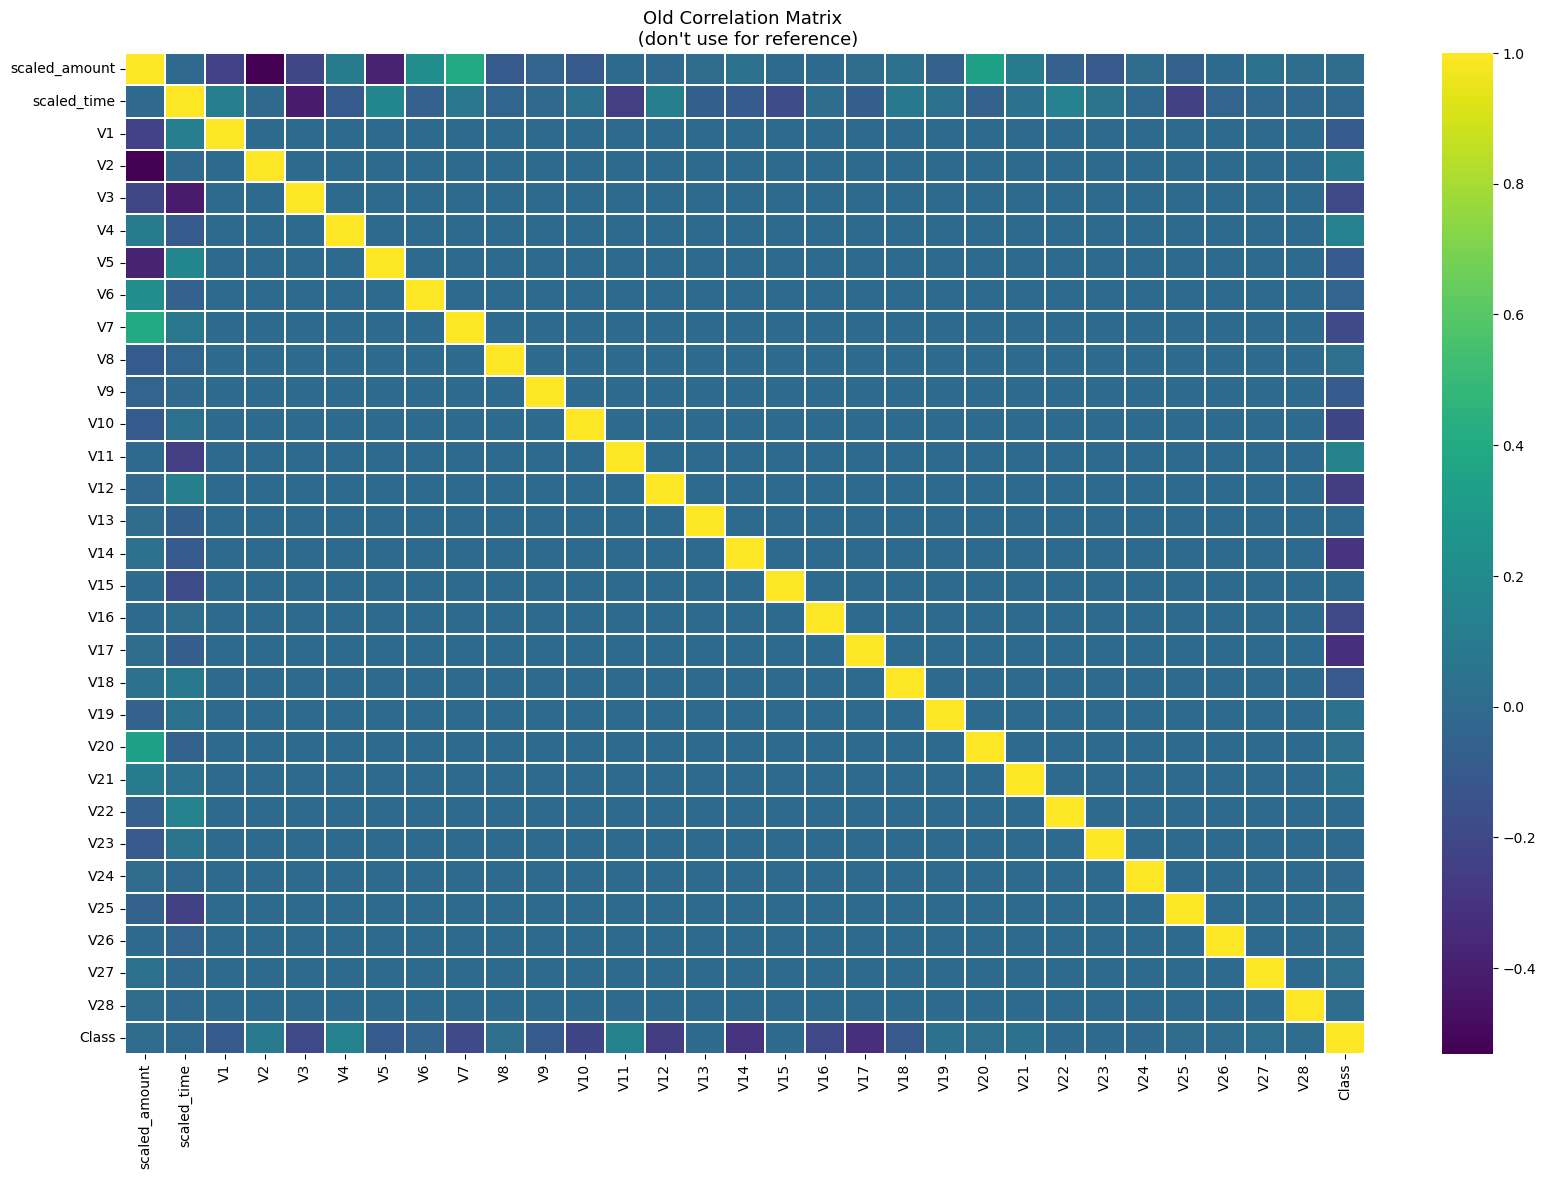

In [20]:
# We will not use this heatmap as a reference. We just use it as observation

corr = df.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr, cmap='viridis', annot_kws={'size':20},linewidths= 0.05)
ax.set_title("Old Correlation Matrix \n (don't use for reference)", fontsize=13)
plt.show()

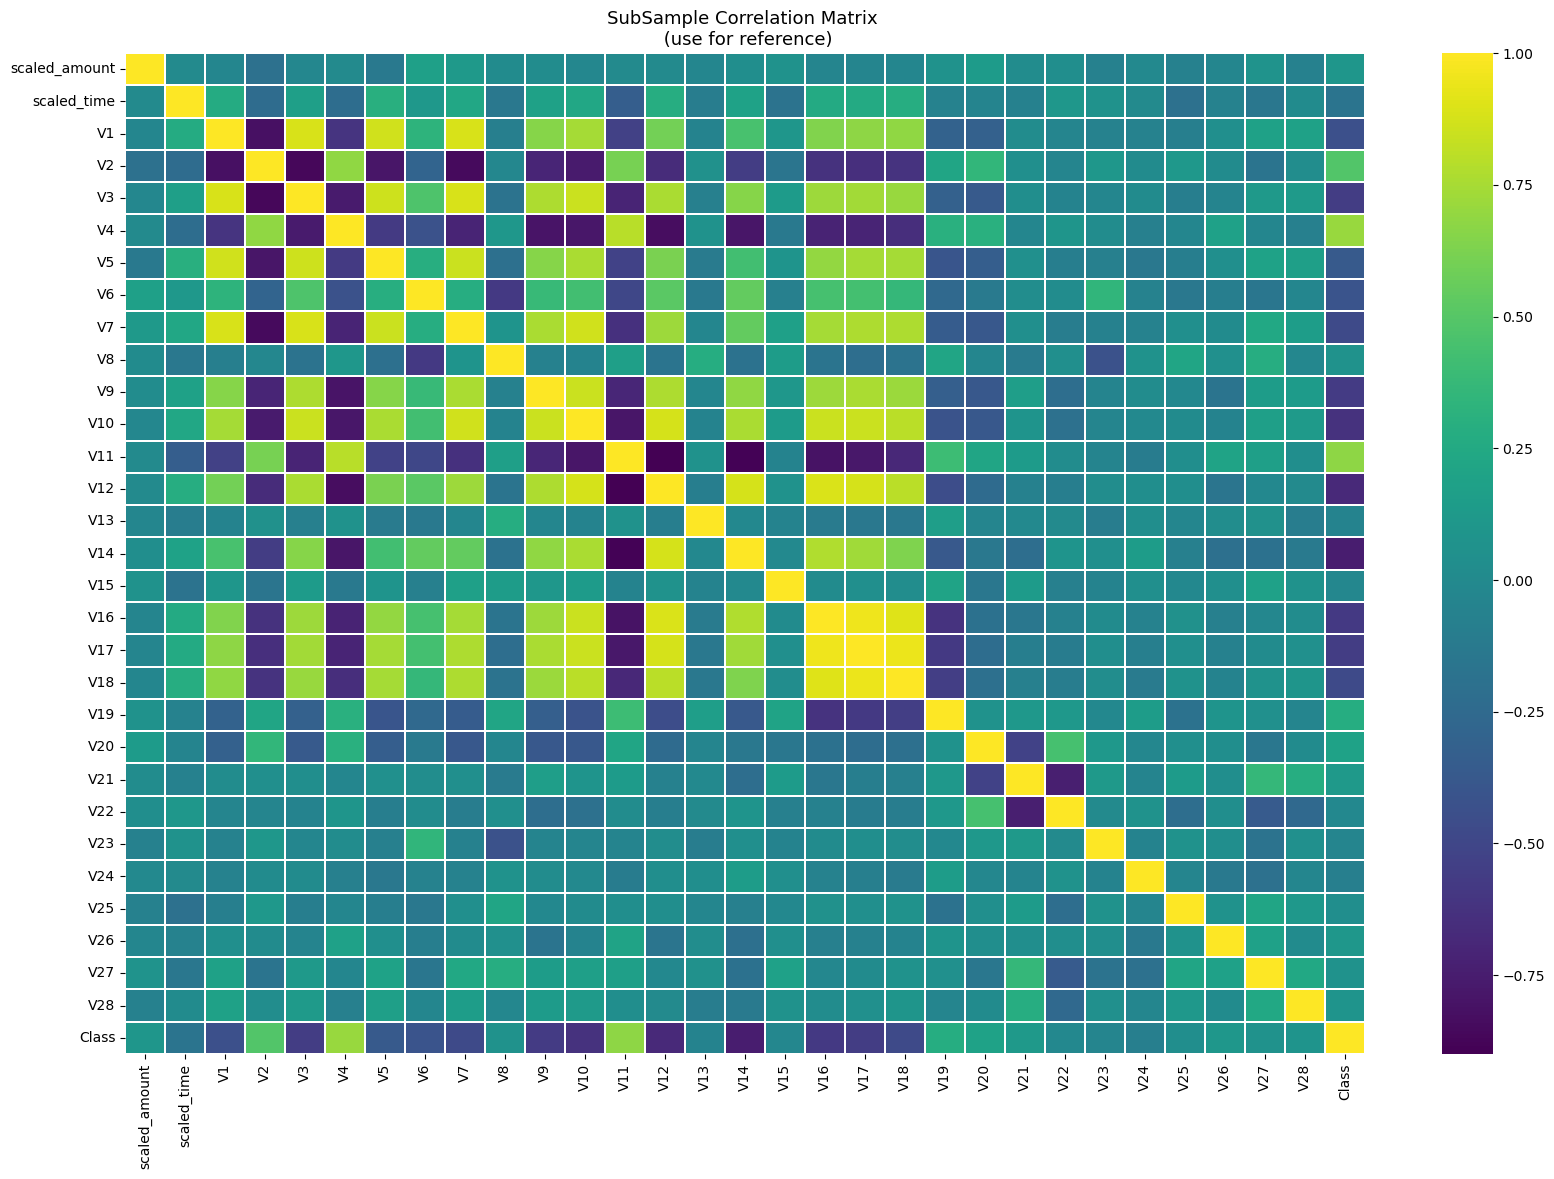

In [21]:
# This is the heatmap that we will use as a reference in the project

corr1 = new_df.corr()
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(corr1, cmap='viridis', annot_kws={'size':20}, linewidths= 0.05)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=13)
plt.show()

Positive Correlation Boxtplos 



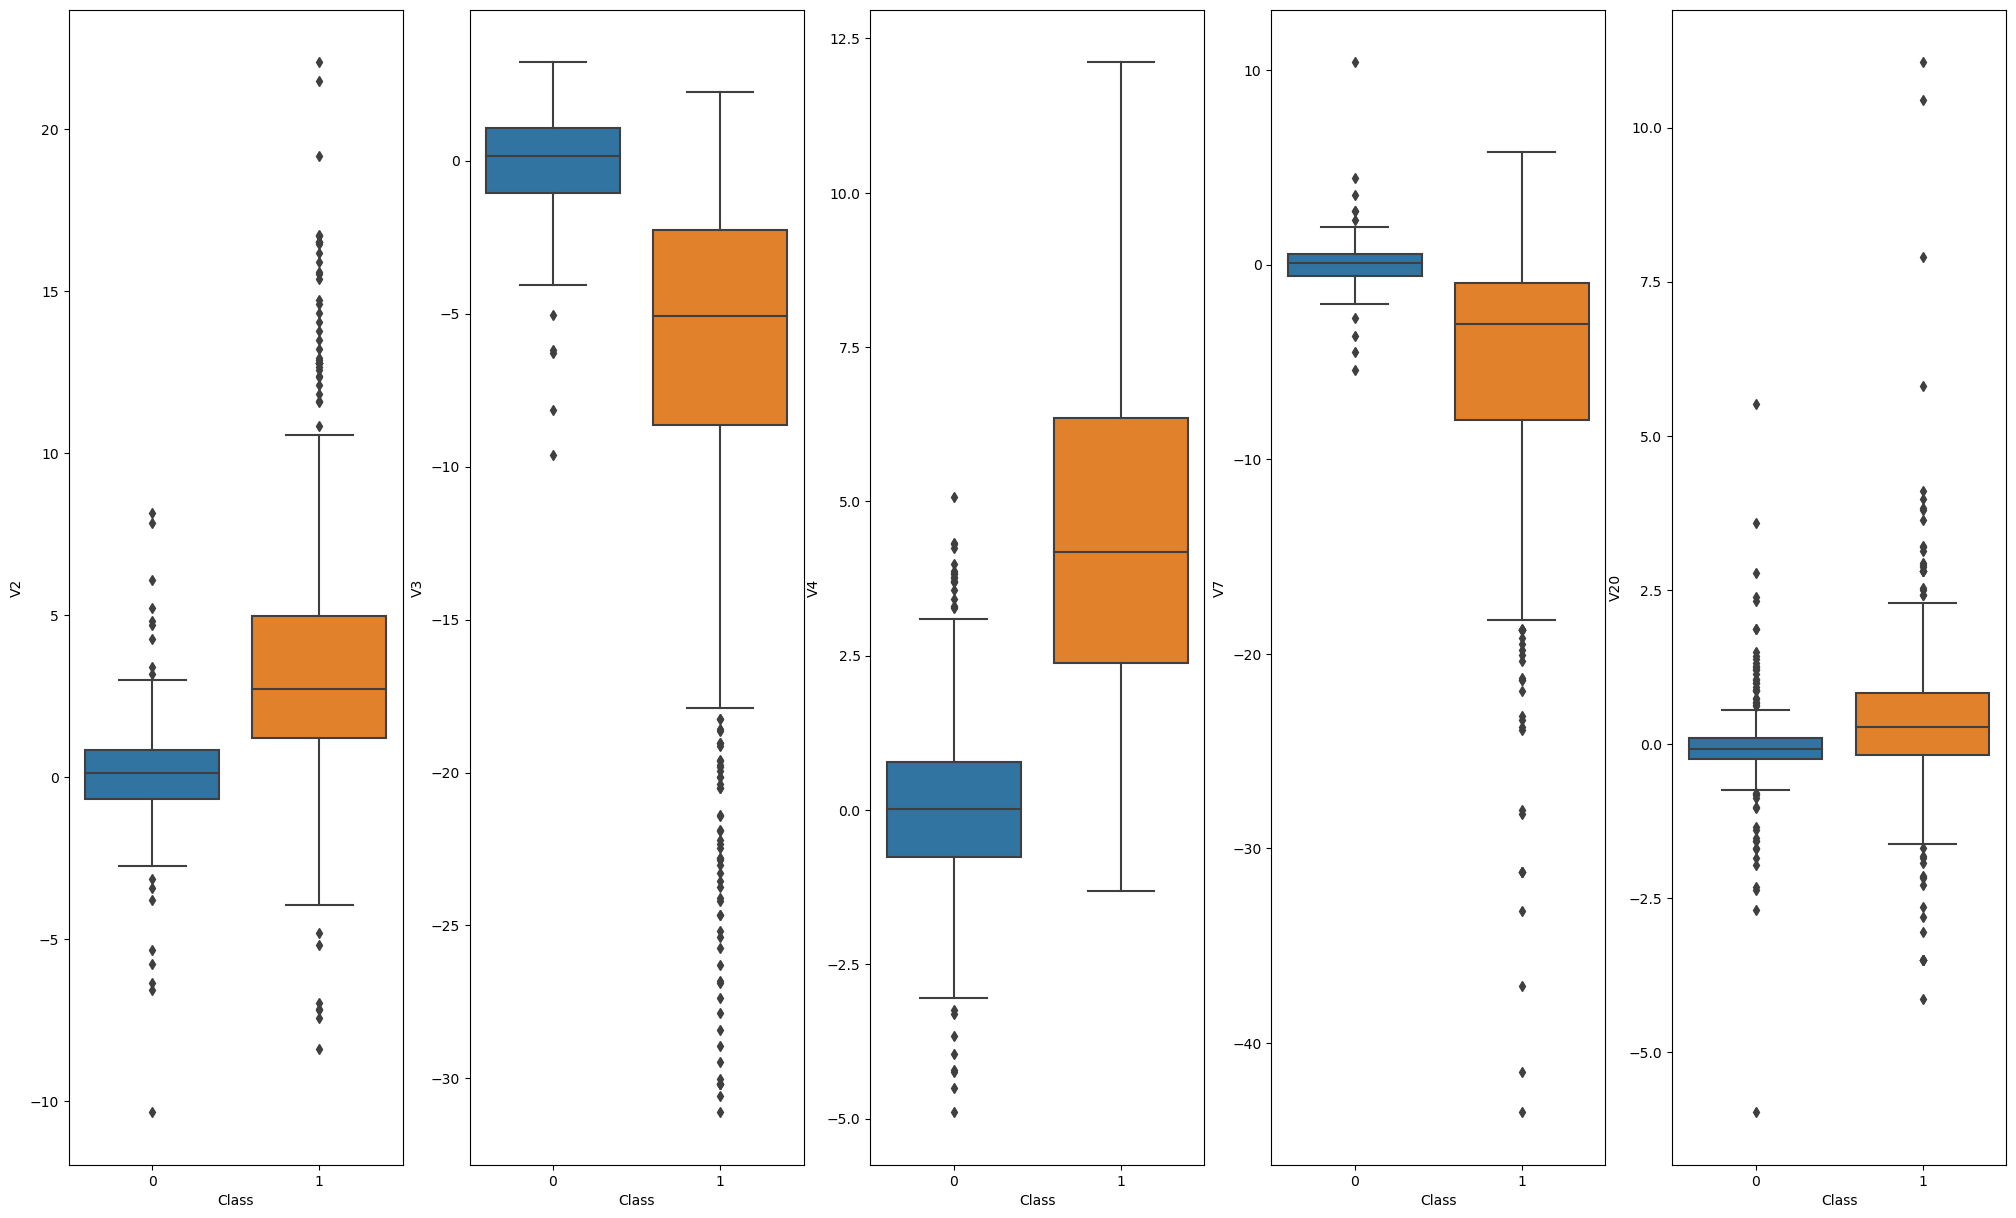

In [22]:
# Find the positive correletaion which can be our outliers
# Positive correlation: The higher the feature value the probability increases that it will be a fraudulent transaction

f, axes = plt.subplots(ncols=5, figsize=(25,15))

sns.boxplot(x='Class' , y ='V2',  data = new_df, ax=axes[0])
sns.boxplot(x='Class' , y ='V3',  data = new_df, ax=axes[1])
sns.boxplot(x='Class' , y ='V4',  data = new_df, ax=axes[2])
sns.boxplot(x='Class' , y ='V7',  data = new_df, ax=axes[3])
sns.boxplot(x='Class' , y ='V20', data = new_df, ax=axes[4])

print('Positive Correlation Boxtplos', '\n')
plt.show()

In [23]:
# We will remove of the extreme outliers from top two positive correlation
# First is the V20

V20_fraud = new_df['V20'].loc[new_df['Class'] == 1 ].values

q25_V20 = np.percentile(V20_fraud , 25)
q75_V20 = np.percentile(V20_fraud , 75)

print('The 25th Quartile is :' , q25_V20)
print('The 75th Quantile is :' , q75_V20)

V20_iqr = q75_V20 - q25_V20

print('The IQR of V20 is :' , V20_iqr , '\n')

V20_off = 1.5 * V20_iqr
V20_lower = q25_V20 - V20_off
V20_upper = q75_V20 + V20_off

print('The V20 that we will remove is :' , V20_off)
print('The min point is :' , V20_lower)
print('The max point is :' , V20_upper , '\n')

outliers_V20 = [i for i in V20_fraud if i < V20_lower or i > V20_upper ]
new_df_V20 = new_df.drop(new_df[(new_df['V20'] > V20_upper) | (new_df['V20'] < V20_lower)].index)

print('The number of the outliers is : ', len(outliers_V20))
print('The number of transactions after the outliers removes is :' , len(new_df_V20))
print('The new dataset after we remove the outliers of v20 is :' , new_df_V20.shape)

The 25th Quartile is : -0.17176003336231627
The 75th Quantile is : 0.8224449078319616
The IQR of V20 is : 0.9942049411942778 

The V20 that we will remove is : 1.4913074117914167
The min point is : -1.6630674451537328
The max point is : 2.3137523196233785 

The number of the outliers is :  41
The number of transactions after the outliers removes is : 930
The new dataset after we remove the outliers of v20 is : (930, 31)


Before and After we apply the IQR method and remove the outliers of V20 



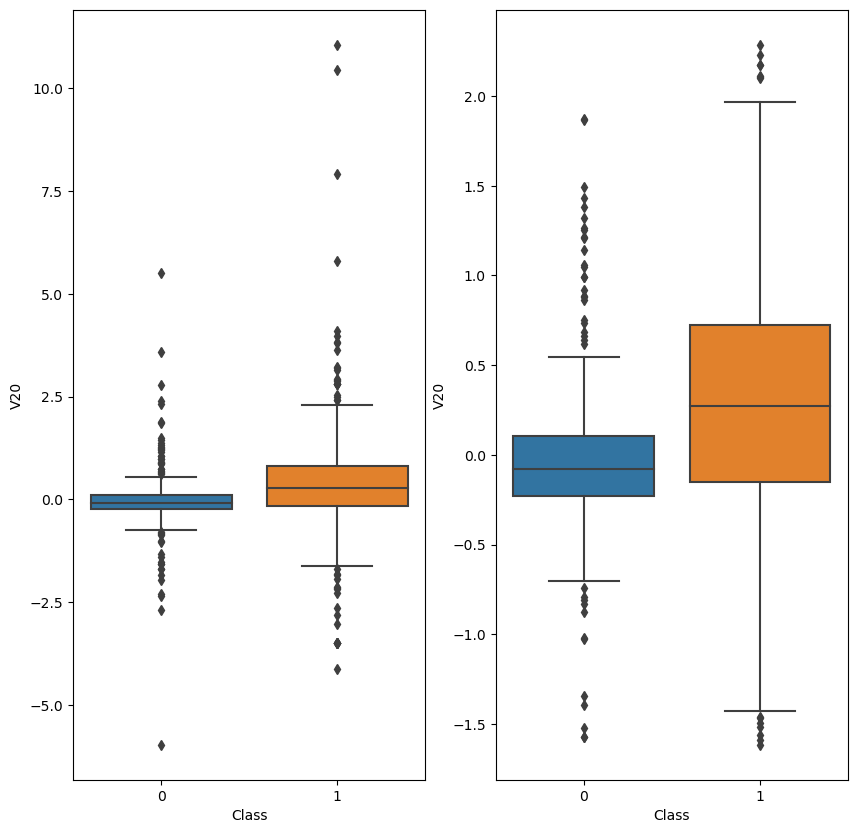

In [24]:
# We can compare our boxplots before and after we remove the outliers of V20. 

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot( x="Class", y="V20", data=new_df, ax=ax1 )
sns.boxplot( x="Class", y="V20", data=new_df_V20, ax=ax2 )

print('Before and After we apply the IQR method and remove the outliers of V20', '\n')

In [25]:
# We will remove of the extreme outliers from top two positive correlation
# Second is the V3

V3_fraud = new_df['V3'].loc[new_df['Class'] == 1 ].values

q25_V3 = np.percentile(V3_fraud , 25)
q75_V3 = np.percentile(V3_fraud , 75)

print('The 25th Quartile is :'  , q25_V3)
print('The 75th Quantile is : ' , q75_V3)

V3_iqr = q75_V3 - q25_V3

print('The IQR of V3 is :' , V3_iqr , '\n')
V3_off = 1.5 * V3_iqr
V3_lower = q25_V3 - V3_off
V3_upper = q75_V3 + V3_off

print('The V3 tha we will remove is :' , V3_off)
print('The min point is :' , V3_lower)
print('The max point is :' , V3_upper ,'\n')

outliers_V3 = [i for i in V3_fraud if i < V3_lower or i > V3_upper ]
new_df_V3 = new_df.drop(new_df[(new_df['V3'] > V3_upper) | (new_df['V3'] < V3_lower)].index)

print('The number of the outliers is : ', len(outliers_V3))
print('The number of transactions after the outliers removes is :' , len(new_df_V3))
print('The new dataset after we remove the outliers of V3 is :' , new_df_V3.shape)

The 25th Quartile is : -8.643489255766207
The 75th Quantile is :  -2.27618472719291
The IQR of V3 is : 6.367304528573297 

The V3 tha we will remove is : 9.550956792859946
The min point is : -18.194446048626155
The max point is : 7.274772065667036 

The number of the outliers is :  53
The number of transactions after the outliers removes is : 931
The new dataset after we remove the outliers of V3 is : (931, 31)


Before and After we apply the IQR method and remove the outliers of V3 



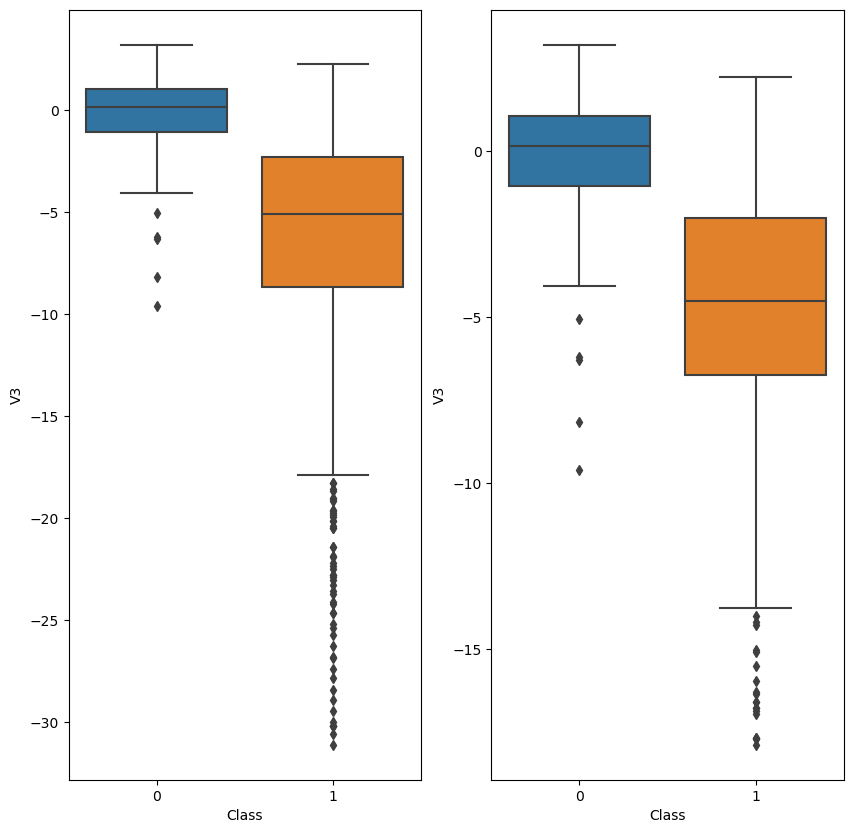

In [26]:
# We can compare our boxplots before and after we remove the outliers of V3 

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot(x="Class", y="V3", data=new_df, ax=ax1)
sns.boxplot(x="Class", y="V3", data=new_df_V3, ax=ax2)

print('Before and After we apply the IQR method and remove the outliers of V3' , '\n')

Negative Correlation Boxtplos 



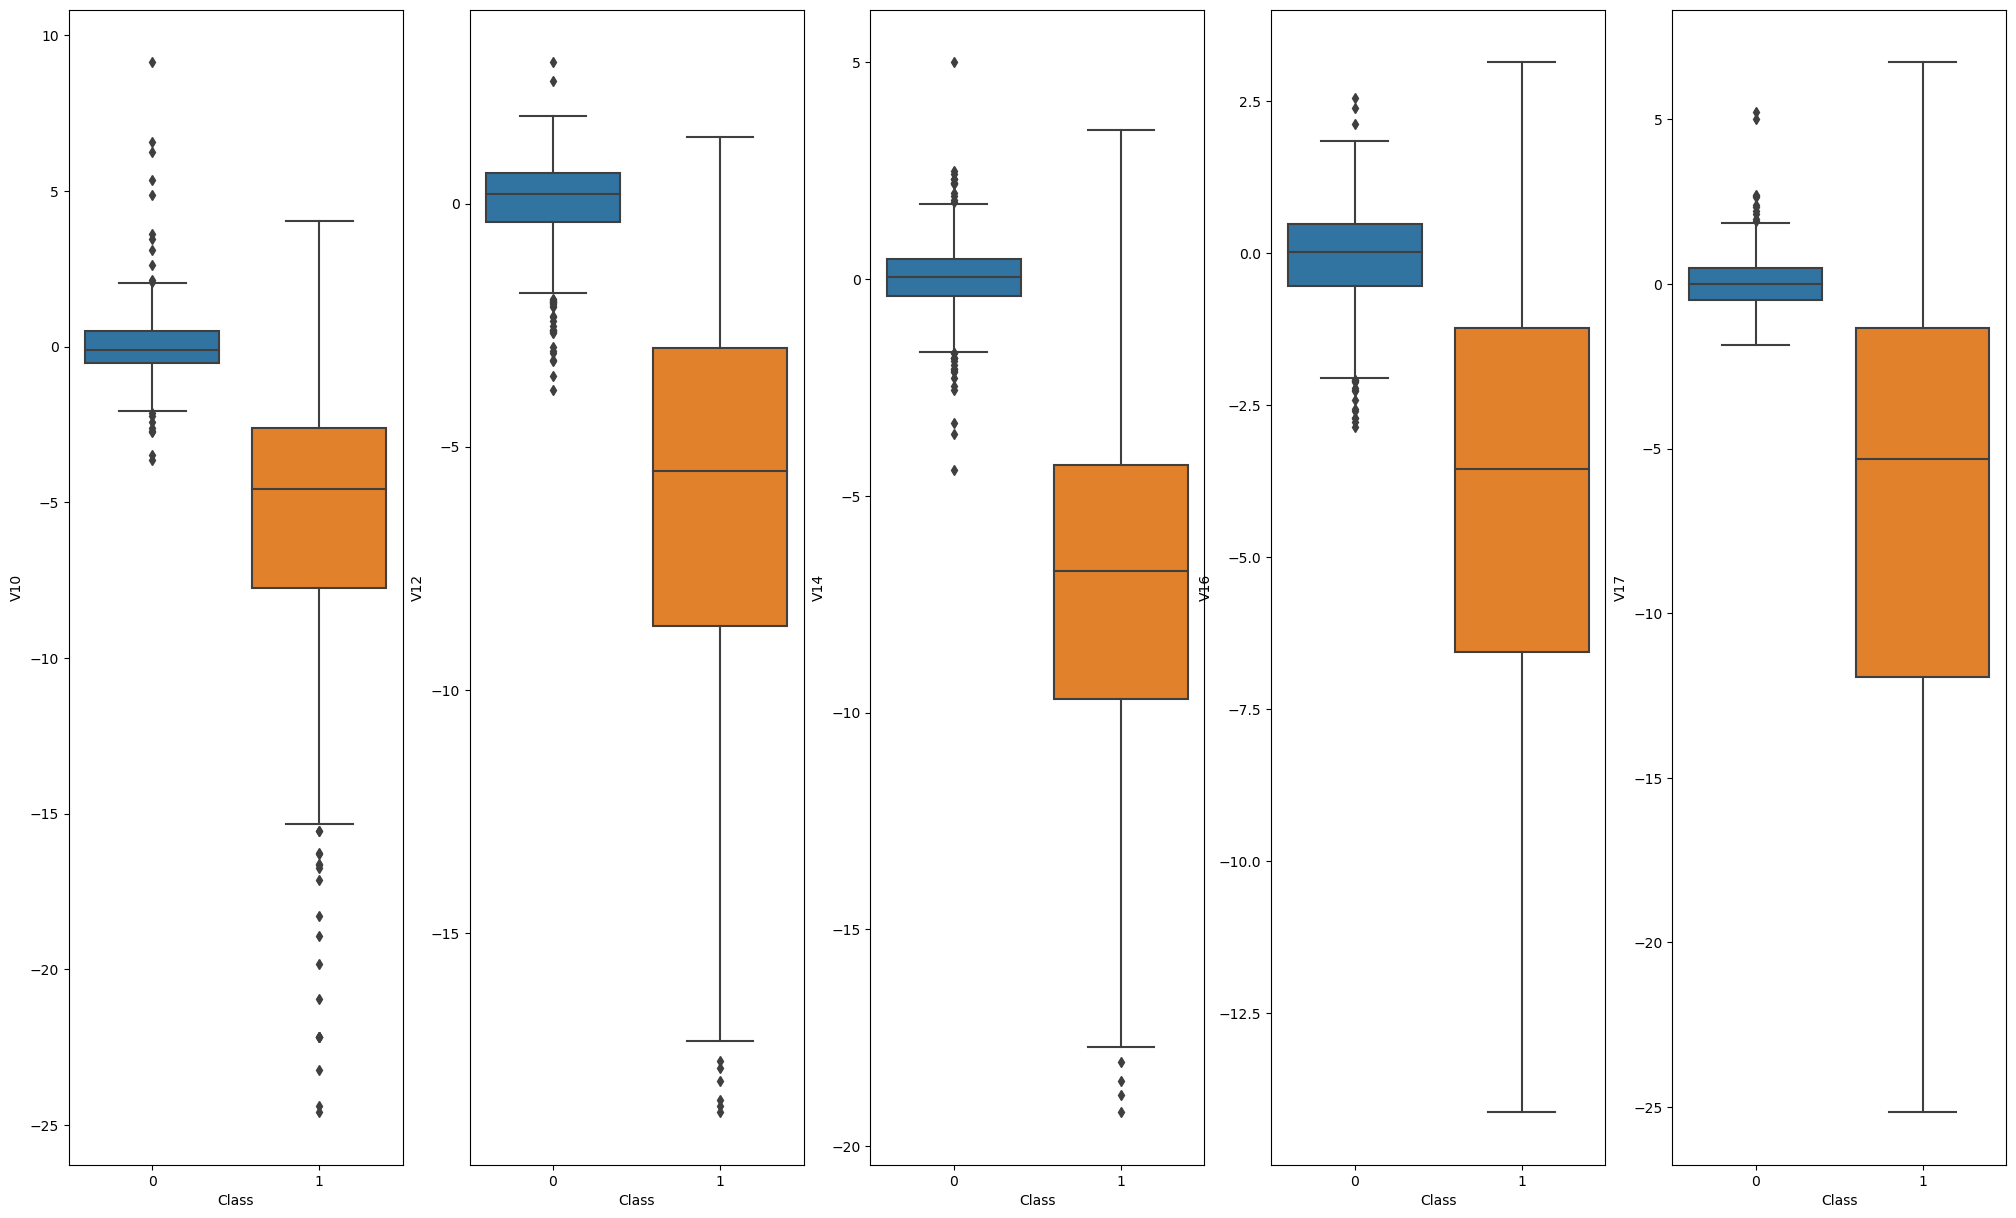

In [27]:
# Negative correlation: The lower the feature value,the probability decreases that it will be a fraudulent transaction.

f, axes = plt.subplots(ncols=5, figsize=(25,15))

sns.boxplot( x='Class' , y ='V10', data = new_df, ax=axes[0] )
sns.boxplot( x='Class' , y ='V12', data = new_df, ax=axes[1] )
sns.boxplot( x='Class' , y ='V14', data = new_df, ax=axes[2] )
sns.boxplot( x='Class' , y ='V16', data = new_df, ax=axes[3] )
sns.boxplot( x='Class' , y ='V17', data = new_df, ax=axes[4] )

print('Negative Correlation Boxtplos' , '\n')
plt.show()

In [28]:
# We will remove of the extreme outliers from top two negative correlation
# First the V10

V10_fraud = new_df['V10'].loc[new_df['Class'] == 1 ].values

q25_V10 = np.percentile(V10_fraud , 25)
q75_V10 = np.percentile(V10_fraud , 75)

print('The 25th Quartile is :' , q25_V10)
print('The 75th Quantile is :' , q75_V10)

V10_iqr = q75_V10 - q25_V10

print('The IQR of V10 is :' , V10_iqr , '\n')

V10_off = 1.5* V10_iqr
V10_lower = q25_V10 - V10_off
V10_upper = q75_V10 + V10_off

print('The V10 tha we will remove is :' , V10_off)
print('The min point is :' , V10_lower)
print('The max point is :' , V10_upper , '\n')

outliers_V10 = [i for i in V10_fraud if i < V10_lower or i > V10_upper ]
new_df_V10 = new_df.drop(new_df[(new_df['V10'] > V10_upper) | (new_df['V10'] < V10_lower)].index)

print('The number of the outliers is : ', len(outliers_V10))
print('The number of transactions after the outliers removes is :' , len(new_df_V10))
print('The new dataset after we remove the outliers of V10 is :' ,new_df_V10.shape)

The 25th Quartile is : -7.7566982278474725
The 75th Quantile is : -2.6141839131895623
The IQR of V10 is : 5.142514314657911 

The V10 tha we will remove is : 7.713771471986866
The min point is : -15.47046969983434
The max point is : 5.099587558797303 

The number of the outliers is :  19
The number of transactions after the outliers removes is : 961
The new dataset after we remove the outliers of V10 is : (961, 31)


Before and After we apply the IQR method and remove the outliers of V10 



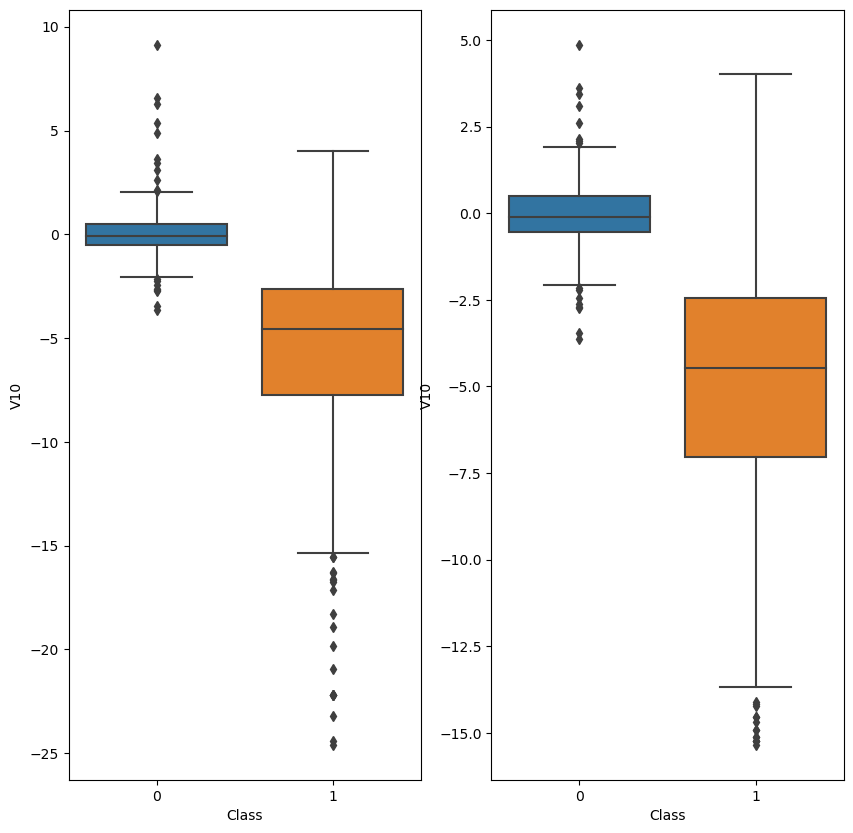

In [29]:
# We can compare our boxplots before and after we remove the outliers of V10

f,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

sns.boxplot( x="Class", y="V10", data=new_df, ax = ax1 )
sns.boxplot( x="Class", y="V10", data=new_df_V10, ax = ax2 )

print('Before and After we apply the IQR method and remove the outliers of V10' , '\n')

In [30]:
# We will remove of the extreme outliers from top two negative correlation
# First the V14

V14_fraud = new_df['V14'].loc[new_df['Class'] == 1 ].values

q25_V14 = np.percentile(V14_fraud , 25)
q75_V14 = np.percentile(V14_fraud , 75)

print('The 25th Quartile is :' , q25_V14)
print('The 75th Quantile is : ' , q75_V14)

V14_iqr = q75_V14 - q25_V14

print('The IQR of V14 is :' , V14_iqr, '\n')

V14_off = 1.5 * V14_iqr
V14_lower = q25_V14 - V14_off
V14_upper = q75_V14 + V14_off

print('The V14 tha we will remove is :' , V14_off)
print('The min point is :' , V14_lower)
print('The max point is :' , V14_upper,'\n')

outliers_V14 = [i for i in V14_fraud if i < V14_lower or i > V14_upper ]
new_df_V14 = new_df.drop(new_df[(new_df['V14'] > V14_upper) | (new_df['V14'] < V14_lower)].index)

print('The number of the outliers is : ', len(outliers_V14))
print('The number of transactions after the outliers removes is :' , len(new_df_V14))
print('The new dataset after we remove the outliers of V14 is :' ,new_df_V14.shape)

The 25th Quartile is : -9.692722964972386
The 75th Quantile is :  -4.282820849486865
The IQR of V14 is : 5.409902115485521 

The V14 tha we will remove is : 8.114853173228282
The min point is : -17.807576138200666
The max point is : 3.8320323237414167 

The number of the outliers is :  4
The number of transactions after the outliers removes is : 979
The new dataset after we remove the outliers of V14 is : (979, 31)


In [40]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [41]:
#train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42 )

In [44]:
X_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
222289,-0.265351,1.012952,-0.385939,0.662918,0.225587,-0.820156,0.479693,0.674373,-0.071316,0.654941,-0.275815,-0.660630,-0.307248,0.828030,0.907725,0.213287,-0.398948,0.817695,-0.968599,0.571057,1.005356,-0.016900,-0.084106,-0.391649,0.183420,-0.340588,-1.198989,0.184933,0.061842,0.141999
14850,-0.261273,-1.446361,-0.302460,0.475870,1.483566,-0.885465,-0.014437,0.097939,0.292041,0.223730,-0.389367,-0.529107,1.223753,0.509627,-0.114175,0.249098,0.630997,0.326103,-0.435509,-0.077055,0.219134,0.015799,0.006908,-0.054353,-0.028661,-0.258446,-0.376909,0.896428,-0.040739,-0.000373
110111,-0.173316,-0.487109,1.371404,-0.596838,0.316138,-0.748005,-0.961965,-0.767155,-0.543904,-0.144291,-0.666412,0.609574,-0.713681,-0.980826,-0.247246,-0.070652,0.912683,1.410296,0.067894,-1.346843,0.787987,0.124109,-0.112176,-0.549585,0.047796,-0.153790,0.265141,-0.452201,-0.000694,0.022746
271989,0.406407,1.474963,1.826912,-1.498730,-0.562577,-0.702019,-1.375548,-0.694324,-0.806724,-0.214260,0.018943,0.668875,-0.756913,-0.222723,1.029514,-0.577095,0.533716,1.410926,-0.107167,-0.954552,0.270879,0.387721,0.503763,1.136870,-0.047829,-0.044684,-0.225528,-0.080247,-0.013236,-0.013496
77033,-0.278105,-0.799314,-0.439202,1.345101,1.974671,1.927232,0.127956,-0.587188,0.914503,-0.094313,-1.444558,0.206871,-0.288830,0.061273,0.519382,0.107761,0.204342,0.524864,-0.558236,-0.458000,-0.881147,-0.036466,-0.093642,-0.375438,0.099859,0.664125,-0.557163,-0.381900,0.123927,0.163039


Model Accuracy: 1.0
Model Precision: 0.96
Model Recall: 0.8
Model F1-Score: 0.87
Model ROC: 0.9 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56863
       Fraud       0.96      0.80      0.87        99

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



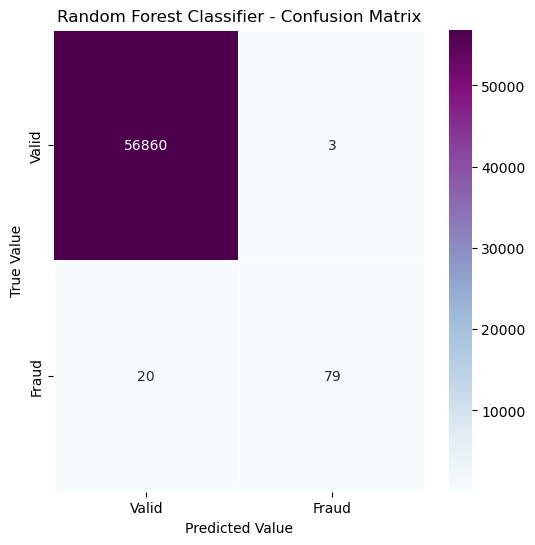

In [46]:
#Random Forest Classifier
rfc=RandomForestClassifier( random_state = 42 ) 
rfc.fit(X_train, y_train) 
rfc.predict(X_test)
Y_pred=rfc.predict(X_test) 
print("Model Accuracy:", round(accuracy_score(y_test, Y_pred),2))
print("Model Precision:", round(precision_score(y_test, Y_pred),2))
print("Model Recall:", round(recall_score(y_test, Y_pred),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred),2))
print("Model ROC:", round(roc_auc_score(y_test, Y_pred),2) , '\n')
conf_matrix=confusion_matrix(y_test, Y_pred) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, Y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.9
Model Recall: 0.62
Model F1-Score: 0.73
Model ROC: 0.81 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56863
       Fraud       0.96      0.80      0.87        99

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



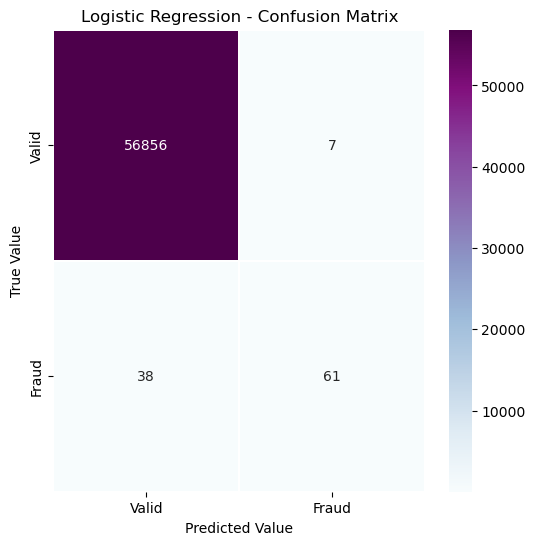

In [49]:
#Logistic Regression Classifier
logistic_reg=LogisticRegression( random_state = 42 ) 
logistic_reg.fit(X_train, y_train) 
logistic_reg.predict(X_test)
Y_pred1=logistic_reg.predict(X_test) 
print("Model Accuracy:", round(accuracy_score(y_test, Y_pred1),2))
print("Model Precision:", round(precision_score(y_test, Y_pred1),2))
print("Model Recall:", round(recall_score(y_test, Y_pred1),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred1),2))
print("Model ROC:", round(roc_auc_score(y_test, Y_pred1),2) , '\n')
conf_matrix=confusion_matrix(y_test, Y_pred1) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, Y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.84
Model Recall: 0.77
Model F1-Score: 0.8
Model ROC: 0.88 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56863
       Fraud       0.96      0.80      0.87        99

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



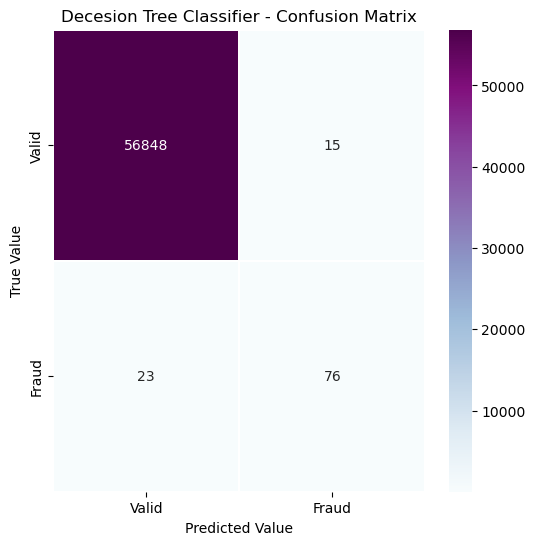

In [50]:
#Decision Tree Classifier
decesion_tree_clf=DecisionTreeClassifier( random_state = 42 ) 
decesion_tree_clf.fit(X_train, y_train) 
decesion_tree_clf.predict(X_test)
Y_pred2=decesion_tree_clf.predict(X_test) 
print("Model Accuracy:", round(accuracy_score(y_test, Y_pred2),2))
print("Model Precision:", round(precision_score(y_test, Y_pred2),2))
print("Model Recall:", round(recall_score(y_test, Y_pred2),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred2),2))
print("Model ROC:", round(roc_auc_score(y_test, Y_pred2),2) , '\n')
conf_matrix=confusion_matrix(y_test, Y_pred2) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, Y_pred, target_names=labels) , '\n')

plt.title("Decesion Tree Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Model Accuracy: 1.0
Model Precision: 0.97
Model Recall: 0.66
Model F1-Score: 0.78
Model ROC: 0.83 

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56863
       Fraud       0.96      0.80      0.87        99

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 



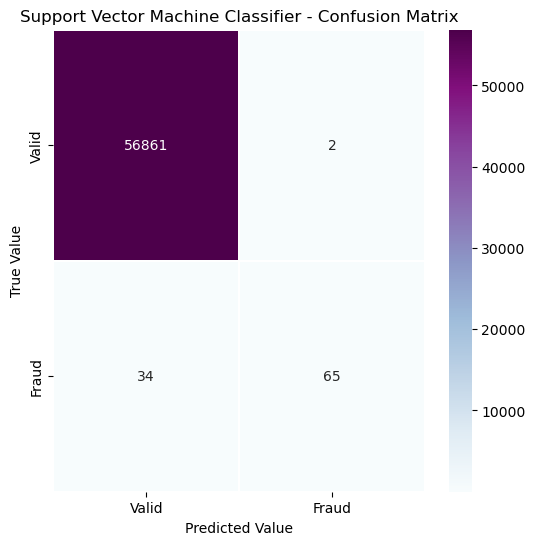

In [51]:
# SVM CLASSIFIER MODEL
# SVM = Support Vector Machine
svm_clf=SVC( random_state = 42 ) 
svm_clf.fit(X_train, y_train) 
svm_clf.predict(X_test)
Y_pred3=svm_clf.predict(X_test) 
print("Model Accuracy:", round(accuracy_score(y_test, Y_pred3),2))
print("Model Precision:", round(precision_score(y_test, Y_pred3),2))
print("Model Recall:", round(recall_score(y_test, Y_pred3),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred3),2))
print("Model ROC:", round(roc_auc_score(y_test, Y_pred3),2) , '\n')
conf_matrix=confusion_matrix(y_test, Y_pred3) 
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(6, 6)) 

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels, 
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_test, Y_pred, target_names=labels) , '\n')

plt.title("Support Vector Machine Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()